In [1]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys,walk_through_dir

In [2]:
train_dir='101_food_classes_10_percent/train/'
test_dir='101_food_classes_10_percent/test/'

In [3]:
walk_through_dir('101_food_classes_10_percent/')

There are 2 directories and 0 images in '101_food_classes_10_percent/'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\apple_pie'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\baby_back_ribs'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\baklava'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\beef_carpaccio'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\beef_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\beet_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\beignets'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\bibimbap'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\bread_pudding'.
There are 0 directories and 250 images in '1

There are 0 directories and 250 images in '101_food_classes_10_percent/test\strawberry_shortcake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\sushi'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\tacos'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\takoyaki'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\tiramisu'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\tuna_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test\waffles'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train\apple_pie'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train\baby_back_ribs'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train\baklava'.
There are 0 directories and 75 image

In [4]:
import tensorflow as tf
IMG_SIZE=(128,128)
train_data_all_10_persent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                              label_mode='categorical',
                                                                              image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=IMG_SIZE,
                                                              shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [5]:
# create checkpoint callback
checkpoint_path='101_classes_10_percent_data_model_checkpoint'
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       save_weights_only=True,
                                                       monitor='val_accuracy',
                                                       save_best_only=True)

In [6]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# setup data augmentation
data_augmentation=Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    # preprocessing.Rescaling(1/255.)
],name='data_augmentation')

In [7]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(128,128,3),name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
outputs=tf.keras.layers.Dense(len(train_data_all_10_persent.class_names),activation='softmax',name='output_layer')(x)
model=tf.keras.Model(inputs,outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 128, 128, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_all_class_10_percent=model.fit(train_data_all_10_persent,
                                       epochs=5,
                                       validation_data=test_data,
                                       validation_steps=int(0.15*len(test_data)),
                                       callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 120s 420ms/step - loss: 3.6877 - accuracy: 0.1971 - val_loss: 2.9586 - val_accuracy: 0.3265
Epoch 2/5
237/237 [==============================] - 78s 331ms/step - loss: 2.6541 - accuracy: 0.3843 - val_loss: 2.5662 - val_accuracy: 0.3808
Epoch 3/5
237/237 [==============================] - 68s 287ms/step - loss: 2.2946 - accuracy: 0.4479 - val_loss: 2.3971 - val_accuracy: 0.4115
Epoch 4/5
237/237 [==============================] - 68s 287ms/step - loss: 2.0870 - accuracy: 0.4848 - val_loss: 2.3274 - val_accuracy: 0.4200
Epoch 5/5
237/237 [==============================] - 64s 271ms/step - loss: 1.9287 - accuracy: 0.5168 - val_loss: 2.3241 - val_accuracy: 0.4123


In [10]:
feature_extraction_result=model.evaluate(test_data)
feature_extraction_result

790/790 [==============================] - 38s 48ms/step - loss: 2.1047 - accuracy: 0.4612


[2.104659080505371, 0.46118810772895813]

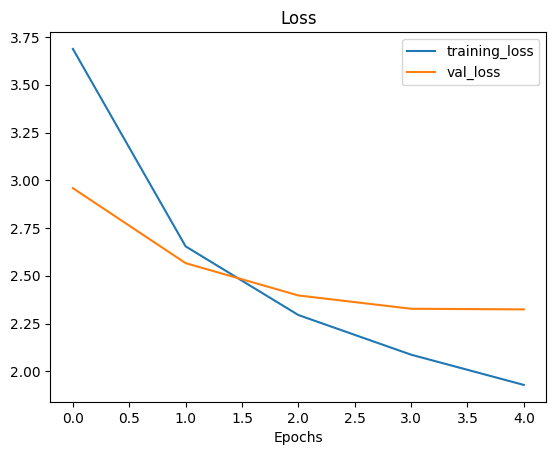

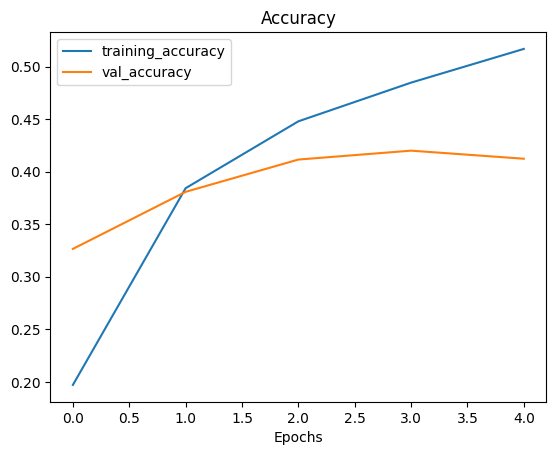

In [11]:
plot_loss_curves(history_all_class_10_percent)

In [12]:
# unfreeze all the layers
base_model.trainable=True

# refreeze every layer except the last 5
for layer in base_model.layers[:-5]:
    layer.trainable=False

In [13]:
# recompile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [14]:
for layer in base_model.layers[-5:]:
    print(layer.name,layer.trainable)

block7a_project_conv True
block7a_project_bn True
top_conv True
top_bn True
top_activation True


In [15]:
fine_tune_epochs=10
history_all_class_10_percent_fine_tune=model.fit(train_data_all_10_persent,
                                                 epochs=fine_tune_epochs,
                                                 validation_data=test_data,
                                                 validation_steps=int(0.15*len(test_data)),
                                                 initial_epoch=history_all_class_10_percent.epoch[-1])

Epoch 5/10
237/237 [==============================] - 75s 284ms/step - loss: 1.6631 - accuracy: 0.5651 - val_loss: 2.2635 - val_accuracy: 0.4317
Epoch 6/10
237/237 [==============================] - 64s 269ms/step - loss: 1.5481 - accuracy: 0.5947 - val_loss: 2.3064 - val_accuracy: 0.4227
Epoch 7/10
237/237 [==============================] - 63s 267ms/step - loss: 1.4678 - accuracy: 0.6141 - val_loss: 2.2724 - val_accuracy: 0.4383
Epoch 8/10
237/237 [==============================] - 63s 267ms/step - loss: 1.3731 - accuracy: 0.6359 - val_loss: 2.2515 - val_accuracy: 0.4433
Epoch 9/10
237/237 [==============================] - 63s 265ms/step - loss: 1.3092 - accuracy: 0.6495 - val_loss: 2.2572 - val_accuracy: 0.4415
Epoch 10/10
237/237 [==============================] - 63s 264ms/step - loss: 1.2567 - accuracy: 0.6619 - val_loss: 2.2833 - val_accuracy: 0.4433


In [16]:
all_class_10_percent_fine_tune_results=model.evaluate(test_data)
all_class_10_percent_fine_tune_results

790/790 [==============================] - 35s 45ms/step - loss: 2.0569 - accuracy: 0.4808


[2.0568575859069824, 0.48083168268203735]

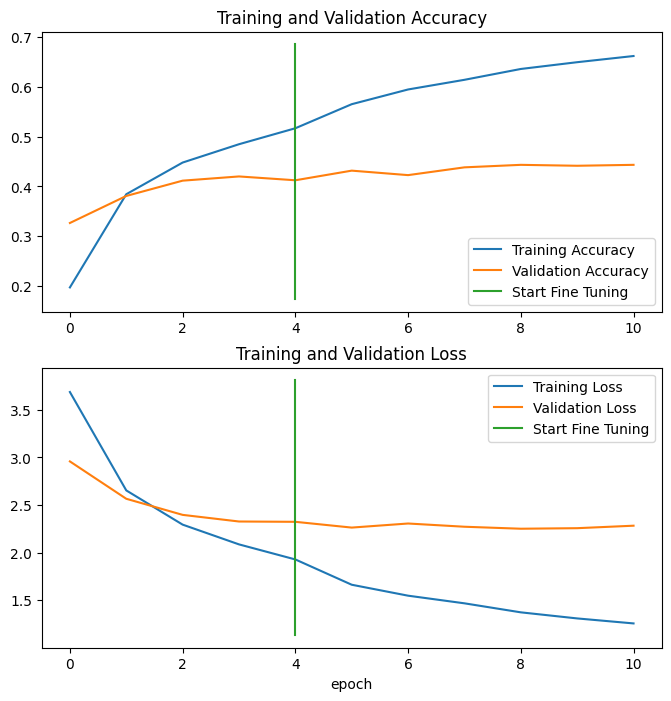

In [17]:
compare_historys(history_all_class_10_percent,history_all_class_10_percent_fine_tune)

In [18]:
# saving the model
#model.save('101_food_classes_10_percent_saved_big_dog_model')

In [19]:
#loaded_model=tf.keras.models.load_model('101_food_classes_10_percent_saved_big_dog_model')

In [20]:
preds_probs=model.predict(test_data,verbose=1)

790/790 [==============================] - 36s 42ms/step


In [21]:
len(test_data)

790

In [22]:
len(preds_probs)  # ~790*32

25250

In [23]:
790*32

25280

In [24]:
preds_probs.shape

(25250, 101)

In [25]:
preds_probs[:10]

array([[3.3889972e-02, 5.1344829e-05, 1.5891142e-01, ..., 3.0143260e-06,
        4.3102782e-03, 3.7117447e-03],
       [9.5035738e-01, 2.8207270e-07, 1.3088092e-02, ..., 8.1800856e-04,
        1.7159828e-06, 3.3653894e-05],
       [1.3685524e-01, 5.6026097e-02, 8.4073571e-03, ..., 5.3164602e-04,
        4.9529765e-03, 7.5203477e-04],
       ...,
       [1.9937100e-01, 3.2188738e-05, 2.9219321e-03, ..., 7.5708153e-03,
        3.6956496e-03, 3.6977264e-04],
       [1.8213421e-01, 1.0297369e-04, 1.8648572e-01, ..., 1.2062503e-03,
        1.1048666e-03, 2.2360028e-04],
       [4.2139250e-01, 5.0099272e-05, 9.0764882e-03, ..., 3.6174774e-02,
        6.8625598e-04, 3.0289069e-03]], dtype=float32)

In [26]:
preds_probs[0],len(preds_probs[0]),sum(preds_probs[0])

(array([3.38899717e-02, 5.13448285e-05, 1.58911422e-01, 1.18038440e-06,
        9.02492538e-05, 9.44186377e-06, 5.78959298e-05, 5.66012823e-05,
        3.73674673e-03, 7.56086409e-03, 3.28385431e-05, 7.63467615e-05,
        4.28339059e-04, 8.15570456e-06, 1.04533543e-03, 9.17514227e-03,
        1.34850998e-04, 3.71711103e-05, 4.98620048e-03, 2.42019858e-04,
        1.31886569e-03, 1.67629951e-05, 1.49402740e-05, 7.79074471e-05,
        4.57691458e-05, 4.64207074e-03, 1.08240417e-03, 1.53926994e-05,
        4.09448408e-02, 6.42018204e-05, 9.96444840e-04, 8.54292943e-04,
        5.70831471e-04, 1.15598214e-05, 1.06155863e-02, 2.10966289e-04,
        1.00932932e-02, 6.10249524e-04, 6.14322396e-03, 9.15867640e-05,
        2.09385646e-03, 4.84096701e-04, 3.94890521e-04, 7.00525125e-05,
        3.93186288e-04, 2.61814166e-05, 2.51960307e-02, 9.93819776e-05,
        4.69347424e-06, 5.38031245e-03, 4.92250547e-04, 2.07110494e-03,
        1.18691914e-01, 1.65343881e-02, 6.51400023e-06, 1.886000

In [27]:
print(f"The class with the highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")

The class with the highest predicted probability by the model for sample 0: 55


In [30]:
test_data.class_names[55]

'hot_dog'

In [31]:
# get pred class of each label
pred_classes=preds_probs.argmax(axis=1)

# how do they look
pred_classes[:10]

array([55,  0,  0,  8,  8, 78, 21,  0,  9,  0], dtype=int64)

In [32]:
len(pred_classes)

25250

In [33]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [34]:
y_labels=[]
for images, labels in test_data.unbatch():
    y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [35]:
from sklearn.metrics import accuracy_score
sklearn_accuracy=accuracy_score(y_labels,pred_classes)
sklearn_accuracy

0.4808316831683168

In [38]:
import numpy as np
np.isclose(all_class_10_percent_fine_tune_results[1],sklearn_accuracy)

True

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from helper_functions import make_confusion_matrix

In [43]:
class_name=test_data.class_names

In [45]:
make_confusion_matrix(y_labels,pred_classes,classes=class_name,figsize=(100,100),
                      text_size=20)

In [50]:
#conf_matrix=confusion_matrix(y_labels,pred_classes)
#sns.heatmap(conf_matrix)

<Axes: >

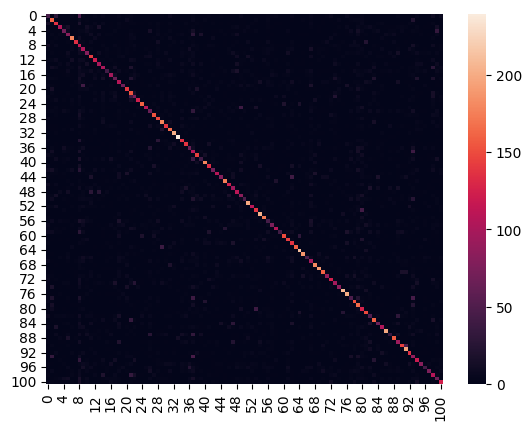

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_labels,pred_classes))

              precision    recall  f1-score   support

           0       0.17      0.18      0.17       250
           1       0.40      0.64      0.49       250
           2       0.46      0.54      0.50       250
           3       0.66      0.42      0.51       250
           4       0.45      0.28      0.34       250
           5       0.34      0.33      0.33       250
           6       0.66      0.71      0.69       250
           7       0.85      0.54      0.66       250
           8       0.16      0.46      0.23       250
           9       0.29      0.41      0.34       250
          10       0.37      0.32      0.35       250
          11       0.45      0.56      0.50       250
          12       0.56      0.48      0.52       250
          13       0.51      0.40      0.44       250
          14       0.41      0.40      0.41       250
          15       0.43      0.17      0.24       250
          16       0.47      0.39      0.42       250
          17       0.33    

In [52]:
classification_report_dict=classification_report(y_labels,pred_classes,output_dict=True)
classification_report_dict

{'0': {'precision': 0.16541353383458646,
  'recall': 0.176,
  'f1-score': 0.17054263565891473,
  'support': 250.0},
 '1': {'precision': 0.4,
  'recall': 0.64,
  'f1-score': 0.4923076923076923,
  'support': 250.0},
 '2': {'precision': 0.45791245791245794,
  'recall': 0.544,
  'f1-score': 0.4972577696526508,
  'support': 250.0},
 '3': {'precision': 0.660377358490566,
  'recall': 0.42,
  'f1-score': 0.5134474327628362,
  'support': 250.0},
 '4': {'precision': 0.44516129032258067,
  'recall': 0.276,
  'f1-score': 0.3407407407407408,
  'support': 250.0},
 '5': {'precision': 0.3416666666666667,
  'recall': 0.328,
  'f1-score': 0.3346938775510204,
  'support': 250.0},
 '6': {'precision': 0.6617100371747212,
  'recall': 0.712,
  'f1-score': 0.6859344894026976,
  'support': 250.0},
 '7': {'precision': 0.8490566037735849,
  'recall': 0.54,
  'f1-score': 0.6601466992665037,
  'support': 250.0},
 '8': {'precision': 0.15654520917678813,
  'recall': 0.464,
  'f1-score': 0.23410696266397582,
  'suppo

In [54]:
# create empty dictionary
class_f1_score={}
for k,v in classification_report_dict.items():
    if k=='accuracy':
        break
    else:
        class_f1_score[class_name[int(k)]]=v['f1-score']
class_f1_score

{'apple_pie': 0.17054263565891473,
 'baby_back_ribs': 0.4923076923076923,
 'baklava': 0.4972577696526508,
 'beef_carpaccio': 0.5134474327628362,
 'beef_tartare': 0.3407407407407408,
 'beet_salad': 0.3346938775510204,
 'beignets': 0.6859344894026976,
 'bibimbap': 0.6601466992665037,
 'bread_pudding': 0.23410696266397582,
 'breakfast_burrito': 0.3421926910299003,
 'bruschetta': 0.3461538461538462,
 'caesar_salad': 0.4991150442477875,
 'cannoli': 0.5182012847965738,
 'caprese_salad': 0.4449438202247191,
 'carrot_cake': 0.4080808080808081,
 'ceviche': 0.2420749279538905,
 'cheese_plate': 0.4235807860262009,
 'cheesecake': 0.2850678733031674,
 'chicken_curry': 0.36148648648648646,
 'chicken_quesadilla': 0.37196765498652296,
 'chicken_wings': 0.5394990366088633,
 'chocolate_cake': 0.4457308248914616,
 'chocolate_mousse': 0.291497975708502,
 'churros': 0.5899280575539568,
 'clam_chowder': 0.6736842105263158,
 'club_sandwich': 0.5255474452554745,
 'crab_cakes': 0.24344569288389514,
 'creme_bru

In [60]:
# turn f1 score in dataframe
import pandas as pd
f1_score=pd.DataFrame({'class_name':list(class_f1_score.keys()),
                      'f1-score':list(class_f1_score.values())}).sort_values('f1-score',ascending=False)
f1_score[:10]

class_name  f1-score
33            edamame  0.919231
86            sashimi  0.796781
75                pho  0.793893
32          dumplings  0.759924
63           macarons  0.751773
65            mussels  0.751004
64          miso_soup  0.741652
54  hot_and_sour_soup  0.732852
69            oysters  0.730769
45      frozen_yogurt  0.720165

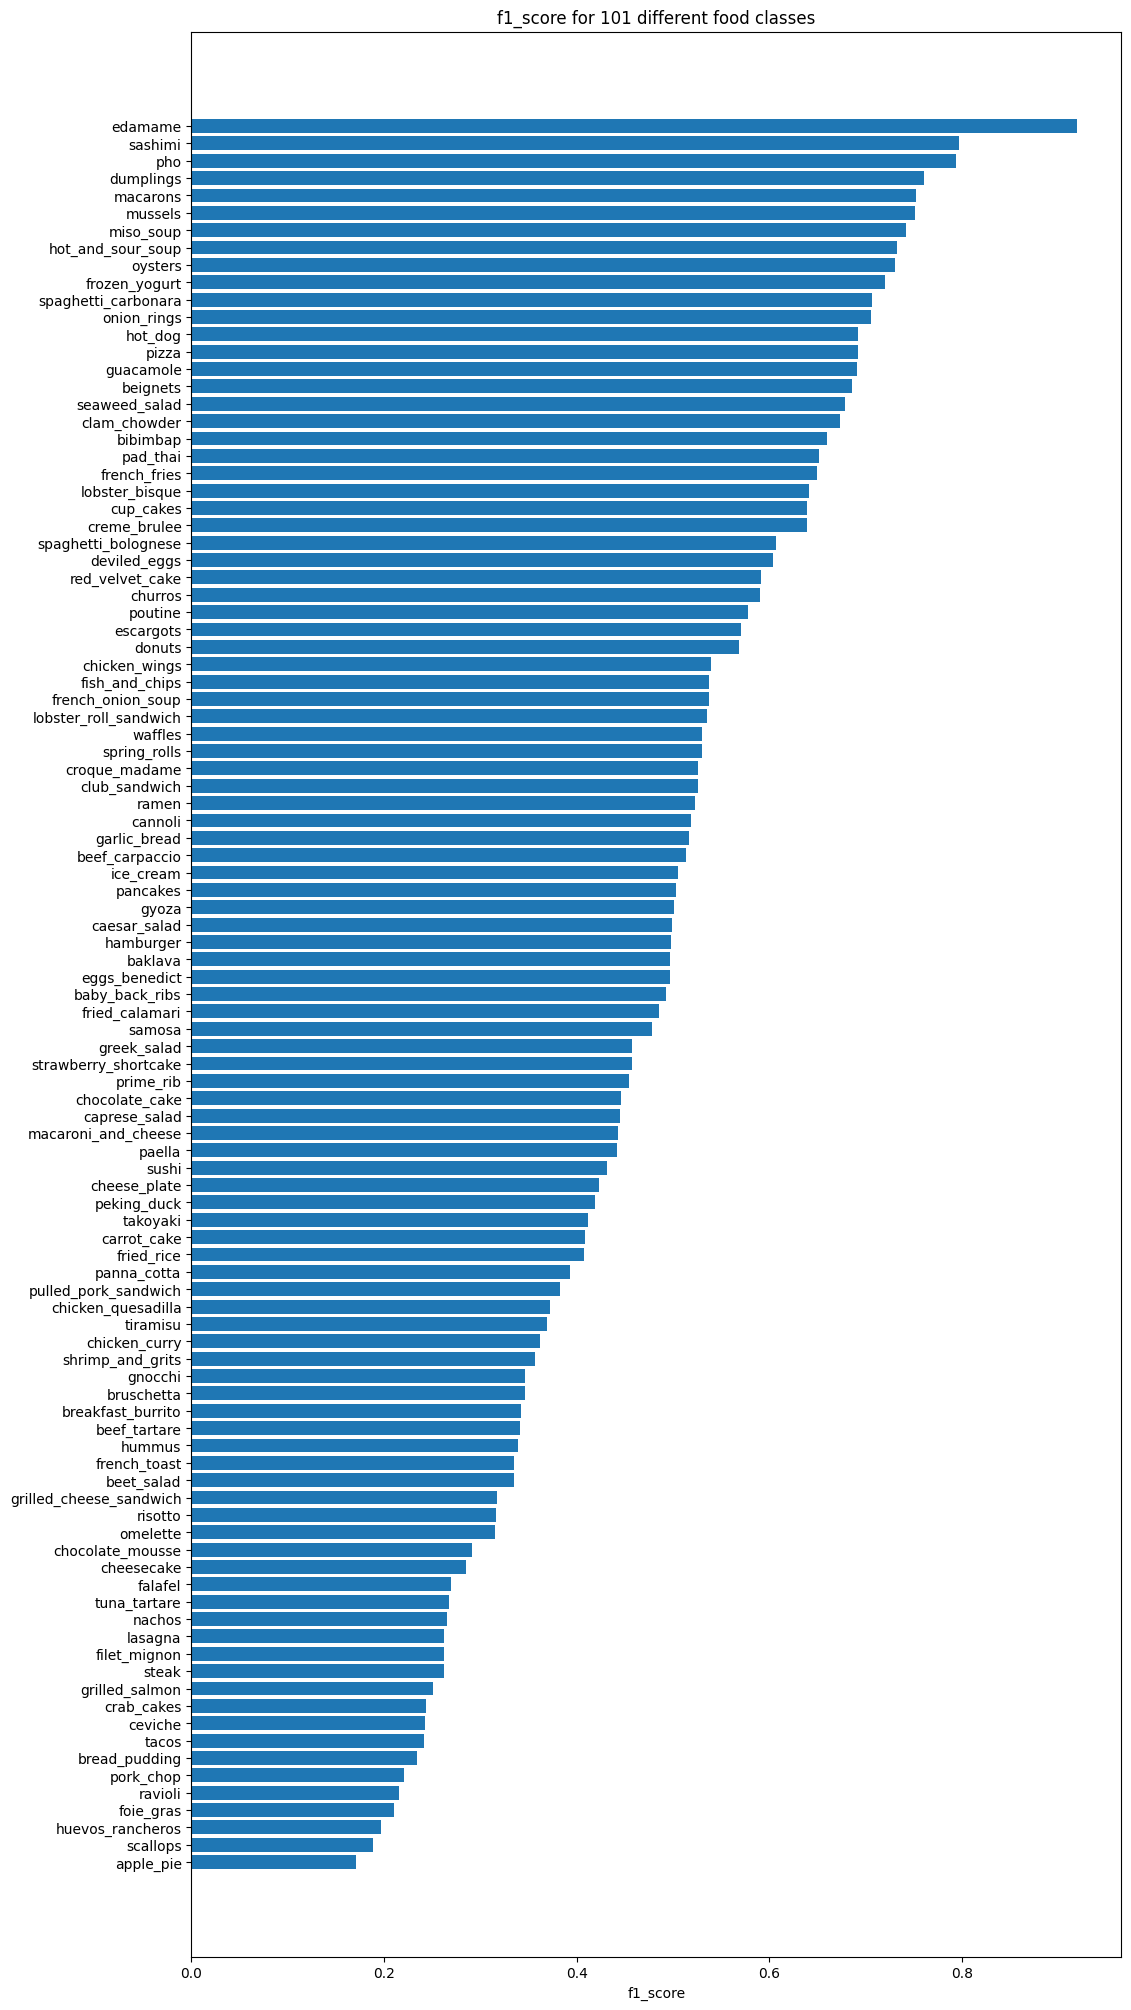

In [64]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,25))
scores=ax.barh(range(len(f1_score)),f1_score['f1-score'].values)
ax.set_yticks(range(len(f1_score)))
ax.set_yticklabels(f1_score['class_name'])
ax.set_xlabel('f1_score')
ax.set_title('f1_score for 101 different food classes')
ax.invert_yaxis();

In [88]:
def load_and_prep_image(filename,img_shape=128,scale=True):
    # read in the image
    img=tf.io.read_file(filename)
    # decode image into tensor
    img=tf.io.decode_image(img,channels=3)
    # resize the image
    img=tf.image.resize(img,[img_shape,img_shape])
    # scale? yes/no
    if scale:
        return img/225.
    else:
        return img

In [83]:
class_names=test_data.class_names
class_names[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

1/1 [==============================] - 0s 30ms/step
38
1/1 [==============================] - 0s 32ms/step
46
1/1 [==============================] - 0s 24ms/step
98


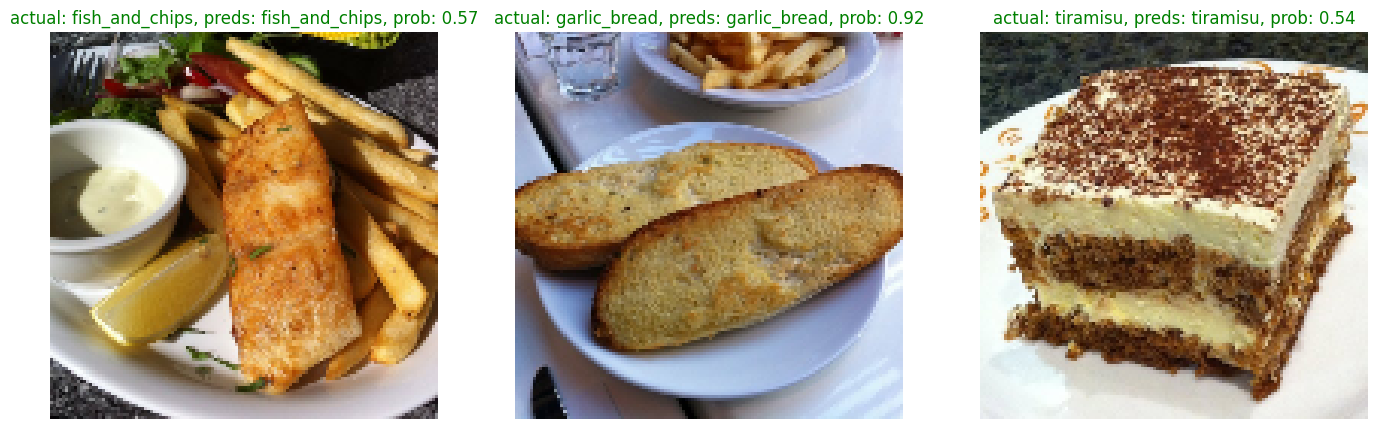

In [106]:
import os 
import random

plt.figure(figsize=(17,10))
for i in range(3):
    
    class_name=random.choice(class_names)
    filename=random.choice(os.listdir(test_dir + "/"+ class_name))
    filepath=test_dir+class_name+'/'+filename
    
    img=load_and_prep_image(filepath,scale=False)
    pred_prob=model.predict(tf.expand_dims(img,axis=0))
    print(pred_prob.argmax())
    pred_class=class_names[pred_prob.argmax()]
    #print(pred_prob)
    #print(pred_class)
    
    # plot the image
    plt.subplot(1,3,i+1)
    plt.imshow(img/255.)
    if class_name==pred_class:
        title_color='g'
    else:
        title_color='r'
    plt.title(f"actual: {class_name}, preds: {pred_class}, prob: {pred_prob.max():.2f}",c=title_color)
    plt.axis(False)

In [107]:
filepaths=[]
for filepath in test_data.list_files('101_food_classes_10_percent/test/*/*.jpg',
                                     shuffle=False):
    filepaths.append(filepath.numpy())
filepaths[:10]

[b'101_food_classes_10_percent\\test\\apple_pie\\1011328.jpg',
 b'101_food_classes_10_percent\\test\\apple_pie\\101251.jpg',
 b'101_food_classes_10_percent\\test\\apple_pie\\1034399.jpg',
 b'101_food_classes_10_percent\\test\\apple_pie\\103801.jpg',
 b'101_food_classes_10_percent\\test\\apple_pie\\1038694.jpg',
 b'101_food_classes_10_percent\\test\\apple_pie\\1047447.jpg',
 b'101_food_classes_10_percent\\test\\apple_pie\\1068632.jpg',
 b'101_food_classes_10_percent\\test\\apple_pie\\110043.jpg',
 b'101_food_classes_10_percent\\test\\apple_pie\\1106961.jpg',
 b'101_food_classes_10_percent\\test\\apple_pie\\1113017.jpg']

In [108]:
pred_df=pd.DataFrame({'img_path':filepaths,
                      'y_true':y_labels,
                      'y_pred':pred_classes,
                      'pred_conf':preds_probs.max(axis=1),
                      'y_true_classname':[class_names[i] for i in y_labels],
                      'y_pred_classname':[class_names[i] for i in pred_classes]})
pred_df

img_path  y_true  y_pred  \
0      b'101_food_classes_10_percent\\test\\apple_pie...       0      55   
1      b'101_food_classes_10_percent\\test\\apple_pie...       0       0   
2      b'101_food_classes_10_percent\\test\\apple_pie...       0       0   
3      b'101_food_classes_10_percent\\test\\apple_pie...       0       8   
4      b'101_food_classes_10_percent\\test\\apple_pie...       0       8   
...                                                  ...     ...     ...   
25245  b'101_food_classes_10_percent\\test\\waffles\\...     100     100   
25246  b'101_food_classes_10_percent\\test\\waffles\\...     100      16   
25247  b'101_food_classes_10_percent\\test\\waffles\\...     100     100   
25248  b'101_food_classes_10_percent\\test\\waffles\\...     100      94   
25249  b'101_food_classes_10_percent\\test\\waffles\\...     100      40   

       pred_conf y_true_classname      y_pred_classname  
0       0.188600        apple_pie               hot_dog  
1       0.950357        apple_pie             apple_pie  
2       0.136855        apple_pie             apple_pie  
3       0.177675        apple_pie         bread_pudding  
4       0.936954        apple_pie         bread_pudding  
...          ...              ...                   ...  
25245   0.611481          waffles               waffles  
25246   0.601109          waffles          cheese_plate  
25247   0.315305          waffles               waffles  
25248   0.136494          waffles  strawberry_shortcake  
25249   0.355349          waffles          french_fries  

[25250 rows x 6 columns]

In [109]:
pred_df['pred_correct']=pred_df['y_true']==pred_df['y_pred']
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent\\test\\apple_pie...       0      55   
1  b'101_food_classes_10_percent\\test\\apple_pie...       0       0   
2  b'101_food_classes_10_percent\\test\\apple_pie...       0       0   
3  b'101_food_classes_10_percent\\test\\apple_pie...       0       8   
4  b'101_food_classes_10_percent\\test\\apple_pie...       0       8   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.188600        apple_pie          hot_dog         False  
1   0.950357        apple_pie        apple_pie          True  
2   0.136855        apple_pie        apple_pie          True  
3   0.177675        apple_pie    bread_pudding         False  
4   0.936954        apple_pie    bread_pudding         False

In [110]:
top_100_wrong=pred_df[pred_df['pred_correct']==False].sort_values('pred_conf',ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  \
22122  b'101_food_classes_10_percent\\test\\seaweed_s...      88      33   
18001  b'101_food_classes_10_percent\\test\\pancakes\...      72      67   
10947  b'101_food_classes_10_percent\\test\\fried_cal...      43      68   
21400  b'101_food_classes_10_percent\\test\\samosa\\3...      85      92   
10116  b'101_food_classes_10_percent\\test\\french_fr...      40      33   
23631  b'101_food_classes_10_percent\\test\\strawberr...      94      83   
15133  b'101_food_classes_10_percent\\test\\lobster_b...      60      64   
13385  b'101_food_classes_10_percent\\test\\hamburger...      53      68   
14062  b'101_food_classes_10_percent\\test\\huevos_ra...      56      28   
10277  b'101_food_classes_10_percent\\test\\french_on...      41      54   
22394  b'101_food_classes_10_percent\\test\\shrimp_an...      89      54   
10741  b'101_food_classes_10_percent\\test\\french_to...      42       1   
22095  b'101_food_classes_10_percent\\test\\seaweed_s...      88      65   
21810  b'101_food_classes_10_percent\\test\\scallops\...      87      29   
11049  b'101_food_classes_10_percent\\test\\fried_ric...      44      62   
21854  b'101_food_classes_10_percent\\test\\scallops\...      87      29   
8734   b'101_food_classes_10_percent\\test\\eggs_bene...      34       8   
3249   b'101_food_classes_10_percent\\test\\cannoli\\...      12      16   
10346  b'101_food_classes_10_percent\\test\\french_on...      41      54   
22578  b'101_food_classes_10_percent\\test\\spaghetti...      90      91   

       pred_conf      y_true_classname     y_pred_classname  pred_correct  
22122   0.999774         seaweed_salad              edamame         False  
18001   0.999096              pancakes             omelette         False  
10947   0.998328        fried_calamari          onion_rings         False  
21400   0.997260                samosa         spring_rolls         False  
10116   0.996892          french_fries              edamame         False  
23631   0.996762  strawberry_shortcake      red_velvet_cake         False  
15133   0.996029        lobster_bisque            miso_soup         False  
13385   0.993798             hamburger          onion_rings         False  
14062   0.993613      huevos_rancheros        croque_madame         False  
10277   0.993496     french_onion_soup    hot_and_sour_soup         False  
22394   0.991971      shrimp_and_grits    hot_and_sour_soup         False  
10741   0.991194          french_toast       baby_back_ribs         False  
22095   0.990961         seaweed_salad              mussels         False  
21810   0.990886              scallops            cup_cakes         False  
11049   0.990263            fried_rice  macaroni_and_cheese         False  
21854   0.989920              scallops            cup_cakes         False  
8734    0.989799         eggs_benedict        bread_pudding         False  
3249    0.989650               cannoli         cheese_plate         False  
10346   0.989368     french_onion_soup    hot_and_sour_soup         False  
22578   0.989238   spaghetti_bolognese  spaghetti_carbonara         False

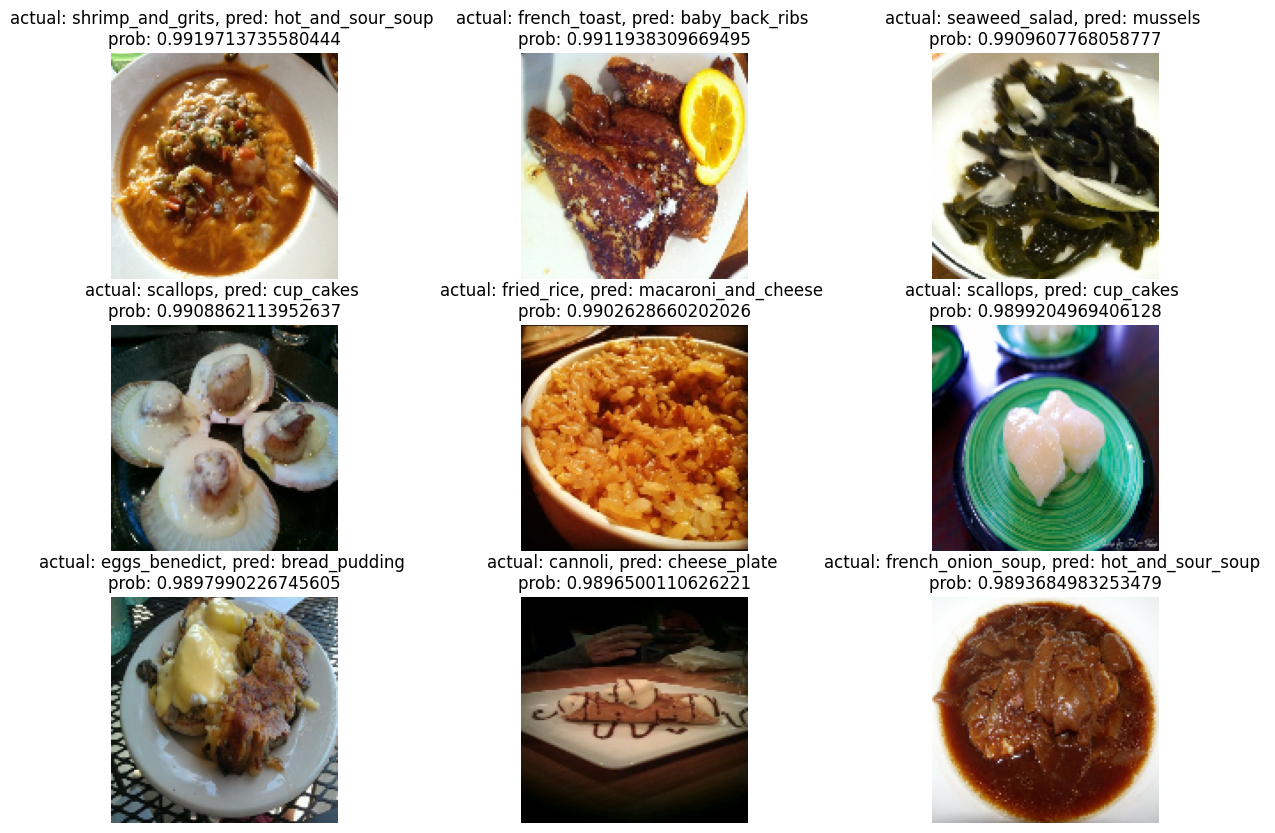

In [113]:
# import itertools
images_to_view=9
start_index=10
plt.figure(figsize=(15,10))
for i,row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
    plt.subplot(3,3,i+1)
    img=load_and_prep_image(row[1],scale=False)
    _,_,_,_,pred_prob,y_true_classname,y_pred_classname,_ = row
    plt.imshow(img/255.)
    plt.title(f"actual: {y_true_classname}, pred: {y_pred_classname} \nprob: {pred_prob}")
    plt.axis(False)

1/1 [==============================] - 0s 31ms/step


(-0.5, 127.5, 127.5, -0.5)

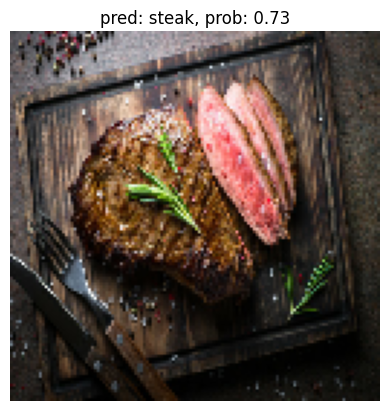

In [121]:
img='steak_image1.jpg'
img=load_and_prep_image(img,scale=False)
pred_prob=model.predict(tf.expand_dims(img,axis=0))
pred_class=class_names[pred_prob.argmax()]

plt.figure()
plt.imshow(img/255.)
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)